# 파이썬의 객체 선언

In [1]:
class Flight:
  pass

In [8]:
# 객체 불러오기
f = Flight()

In [7]:
class Flight:
  # method 선언
  def number(self): # 파이썬 메서드의 첫 파라미터는 관습적으로 self를 사용한다.
    return 'SN060'

In [9]:
f.number()

'SN060'

In [10]:
# 호출 시 호출한 객체 자신이 전달되기때문에 self가 들어간다.
Flight.number(f)

'SN060'

In [11]:
# 생성자로 객체 생성을 호출받으면 먼저 __new__를 호출하여 객체를 생성할당하고 __new__ method가 __init__을 호출하여 객체에서 사용될 초기값들을 초기화한다.
# __init__ method는 생성자가 아님!
# 보통은 __init__ method만 오버라이딩하여 사용하는 경우가 많다.

class Flight:
  def __init__(self):
    print('init')
    super().__init__() # super는 부모 불러오는것임

  def __new__(cls):
    print('new')
    return super().__new__(cls)

  def number(self):
    return 'SN060'

In [12]:
f = Flight()

new
init


In [20]:
class Flight:
  def __init__(self, number):
    self._number = number # 변수 선언
    self._phone = 12

  def number(self):
    return self._number

  def phone(self):
    return self._phone

In [22]:
f = Flight(5)
f.number() # python에는 접근제어자가 없음.. 기본적으로 모두 public
f.phone()

# 단, 내부 메소드로는 접근이 가능하면서 외부에서 함부로 접근 못하게 _ (언더바) 2개를 변수 앞에 붙일 수 있음

12

# 퍼셉트론 구현

In [52]:
import numpy as np

class Perceptron(object):
  # eta는 학습률, n_iter는 데이터셋 학습 반복횟수, random_state는 가중치 초기화 위한 랜덤 생성기
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta # 내부 변수도 이렇게 선언하면 됨
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    # X는 n개의 sample과 n개의 특성으로 이루어진 데이터
    # Y는 n개의 타깃값

    rgen = np.random.RandomState(self.random_state) # 난수 생성기
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # 앞에 1을 더해준건 절편때문임
    self.errors_ = []

    # 내부 변수 부를때 self 사용
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y): # X 한 행과 y값 하나씩 가져온다.
        update = self.eta * (target - self.predict(xi)) # 에측과 타깃을 빼고 학습률 곱합
        self.w_[1:] += update * xi  # 전체 가중치에 대해 업데이트
        self.w_[0] += update * 1
        errors += int(update != 0.0) # True면 더해라인가.. 표현 좋다
      self.errors_.append(errors) # 1 epoch 끝날때마다 error 넣음

    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0] # 결과는 scalar

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1) # 0보다 큰건 1을 반환하고 아니면 -1을 반환

In [49]:
import os
import pandas as pd

s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
print('URL', s)

df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

URL https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


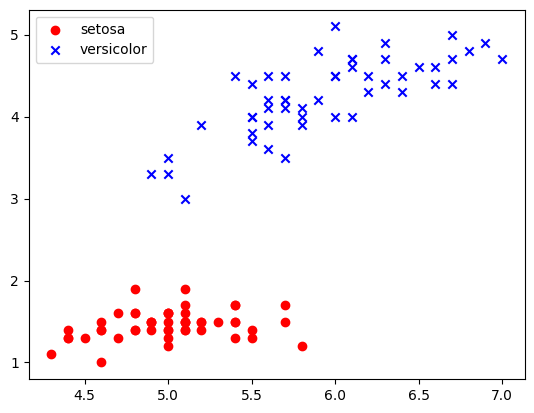

In [50]:
# iris-setosa, iris-versicolor, iris-virginica가 각각 50개씩 들어가잇음
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택한다.
y = df.iloc[0:100, 4].values # 0에서 99까지의 행을 가져오는데 4번 열을 가져옴
y = np.where(y == 'Iris-setosa', -1, 1) # Iris-setosa가 맞으면 -1이고 아니면 1을 반환한다.

# 꽃받침 길이와 꽃잎 길이를 추출한다.
X = df.iloc[0:100, [0,2]].values # coding techinque 기억

# 산점도를 그리자
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='versicolor')
plt.legend(loc='upper left') # location의 줄임말 loc
plt.show()

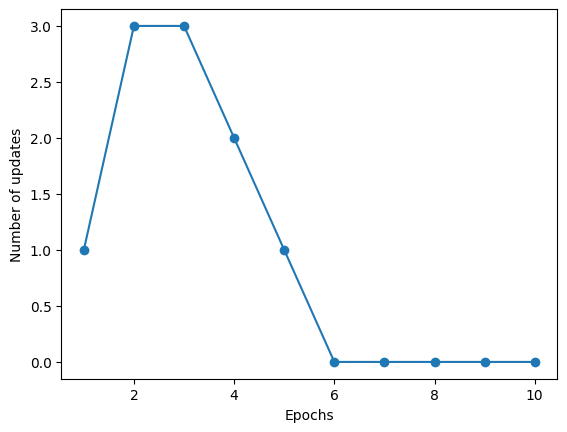

In [53]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

6번째에서 수렴 (더 이상의 업데이트가 발생하지 않았기 때문)